<a href="https://colab.research.google.com/github/Manideep2k4/next-word-generator/blob/main/INT344.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [ ]:
medium_data = pd.read_csv('medium_data.csv')
medium_data.head(2)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30


In [ ]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])


Number of records:  6508
Number of fields:  10


In [ ]:
medium_data['title']

,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I” — How Should You Talk About Yourse...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


In [ ]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

In [ ]:
medium_data['title']

,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I” — How Should You Talk About Yourse...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


In [ ]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

In [ ]:
print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [ ]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# print(input_sequences)
print("Total input sequences: ", len(input_sequences))
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

Total input sequences:  48461


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68], dtype=int32)

In [ ]:
# create features and label
x, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(x[5])
print(labels[5])
print(y[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add((LSTM(150)))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=30)
print(model)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 140s 91ms/step - accuracy: 0.0479 - loss: 7.3068
Epoch 2/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.1236 - loss: 6.4097
Epoch 3/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 142s 89ms/step - accuracy: 0.1524 - loss: 5.9392
Epoch 4/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.1740 - loss: 5.5807
Epoch 5/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 145s 90ms/step - accuracy: 0.1975 - loss: 5.1798
Epoch 6/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.2127 - loss: 4.8681
Epoch 7/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.2371 - loss: 4.5047
Epoch 8/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.2675 - loss: 4.1399
Epoch 9/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 138s 86ms/step - accuracy: 0.2992 - loss: 3.8433
Epoch 10/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 142s 86ms/step - accuracy: 0.3430 - loss: 3.5358
Epoch 11/30
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 143s 87ms/step - accuracy: 0.3831 - loss: 3.26

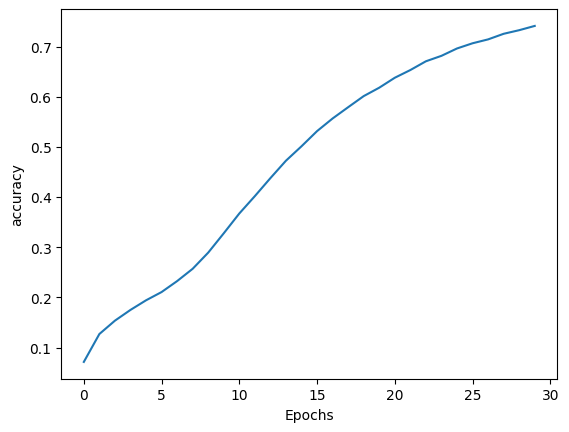

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
dic = tokenizer.word_index
text = "How Donald Trump Markets Himself"
def generate(text,no_of_words):
    for i in range(no_of_words):
        tokenized_text = tokenizer.texts_to_sequences([text])[0]
        padded_seq = pad_sequences([tokenized_text],padding = "pre",maxlen = max_sequence_len-1)
        index = np.argmax(model.predict(padded_seq))
        for key,value in dic.items():
            if index+1 == value:
                text = text+" "+key
                print(text)


In [ ]:
generate("Mani",5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mani in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Mani in game
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mani in game how
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Mani in game how the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Mani in game how the arts
